<a href="https://colab.research.google.com/github/mahmoud25112/High_freq_trading/blob/main/Stage1_HFT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# This will be our first try for stock market predictions

We will be using:

- Classification

- Regression

our target variable will be the log return of the stock then we can calculate the actual return later on


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import TimeSeriesSplit, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
# Additional libraries as needed

#regulrization
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

# Technical Analysis library
!pip install ta
import ta

In [3]:
!pip install alpha_vantage
from alpha_vantage.timeseries import TimeSeries

api_key = 'KS6CZ2I24R7GCSR0'#make sure to remove api key at the end before saving
ts = TimeSeries(key=api_key, output_format='pandas')


In [7]:
data_tesla, meta_data_tesla = ts.get_intraday(symbol='TSLA', interval='1min', outputsize='full')
data_rivian, meta_data_rivian = ts.get_intraday(symbol='RIVN', interval='1min', outputsize='full')
data_lucid, meta_data_lucid = ts.get_intraday(symbol='LCID', interval='1min', outputsize='full')
data_ford, meta_data_ford = ts.get_intraday(symbol='F', interval='1min', outputsize='full')


In [13]:
data_tesla['Stock_name'] = 'Tesla'
print(data_tesla.head())
print()
print(data_tesla.info())


                     1. open  2. high    3. low  4. close  5. volume  \
date                                                                   
2024-10-30 19:59:00   256.24   256.25  256.0785    256.13    10638.0   
2024-10-30 19:58:00   256.20   256.25  256.2000    256.24     2625.0   
2024-10-30 19:57:00   256.13   256.25  256.1300    256.21     1687.0   
2024-10-30 19:56:00   256.15   256.32  256.1300    256.13     1896.0   
2024-10-30 19:55:00   256.17   256.31  256.1300    256.20     1187.0   

                    Stock_name  
date                            
2024-10-30 19:59:00      Tesla  
2024-10-30 19:58:00      Tesla  
2024-10-30 19:57:00      Tesla  
2024-10-30 19:56:00      Tesla  
2024-10-30 19:55:00      Tesla  

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 21120 entries, 2024-10-30 19:59:00 to 2024-10-01 04:00:00
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   1. open     21120 non-null  float

In [12]:
data_rivian['Stock_name'] = 'rivian'
print(data_rivian.head())
print()
print(data_rivian.info())

                     1. open  2. high   3. low  4. close  5. volume Stock_name
date                                                                          
2024-10-30 19:59:00  10.3303  10.3700  10.3300   10.3700     1735.0     rivian
2024-10-30 19:58:00  10.3400  10.3401  10.3300   10.3300     1599.0     rivian
2024-10-30 19:57:00  10.3300  10.3301  10.3300   10.3301      400.0     rivian
2024-10-30 19:56:00  10.3301  10.3600  10.3301   10.3500     2999.0     rivian
2024-10-30 19:55:00  10.3300  10.3400  10.3300   10.3399      264.0     rivian

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 19168 entries, 2024-10-30 19:59:00 to 2024-10-01 04:00:00
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   1. open     19168 non-null  float64
 1   2. high     19168 non-null  float64
 2   3. low      19168 non-null  float64
 3   4. close    19168 non-null  float64
 4   5. volume   19168 non-null  float64
 5   Stock_name 

In [15]:
data_lucid['Stock_name'] = 'Lucid'
print(data_lucid.head())
print()
print(data_lucid.info())


                     1. open  2. high  3. low  4. close  5. volume Stock_name
date                                                                         
2024-10-30 19:59:00   2.3600   2.3600  2.3500      2.36     4785.0      Lucid
2024-10-30 19:58:00   2.3505   2.3700  2.3505      2.36     3473.0      Lucid
2024-10-30 19:57:00   2.3600   2.3700  2.3600      2.37     2194.0      Lucid
2024-10-30 19:56:00   2.3500   2.3700  2.3500      2.37     1669.0      Lucid
2024-10-30 19:55:00   2.3600   2.3601  2.3500      2.36     4580.0      Lucid

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 19990 entries, 2024-10-30 19:59:00 to 2024-10-01 04:00:00
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   1. open     19990 non-null  float64
 1   2. high     19990 non-null  float64
 2   3. low      19990 non-null  float64
 3   4. close    19990 non-null  float64
 4   5. volume   19990 non-null  float64
 5   Stock_name  19990 

In [16]:
data_lucid['Stock_name'] = 'Ford'
print(data_ford.head())
print()
print(data_ford.info())


                     1. open  2. high   3. low  4. close  5. volume
date                                                               
2024-10-30 19:59:00    10.45    10.47  10.4204   10.4204     6418.0
2024-10-30 19:58:00    10.43    10.46  10.4300   10.4600     6301.0
2024-10-30 19:57:00    10.45    10.45  10.4100   10.4100       65.0
2024-10-30 19:56:00    10.43    10.44  10.4100   10.4300      611.0
2024-10-30 19:55:00    10.41    10.45  10.4100   10.4300      218.0

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 18246 entries, 2024-10-30 19:59:00 to 2024-10-01 04:00:00
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   1. open    18246 non-null  float64
 1   2. high    18246 non-null  float64
 2   3. low     18246 non-null  float64
 3   4. close   18246 non-null  float64
 4   5. volume  18246 non-null  float64
dtypes: float64(5)
memory usage: 855.3 KB
None


In [17]:
data_tesla.isnull().sum()

,0
1. open,0
2. high,0
3. low,0
4. close,0
5. volume,0
Stock_name,0


we're calculating the log return at each interval using the closing price divided by the future closing price

Reason for choosing Log return as target
- Time Additivity: Log returns over multiple periods can be summed to obtain the total log return over that period.
- Normality Assumption: Log returns are more likely to be normally distributed, which is a common assumption in many statistical models.

We will be also using the log return to calculate volatility and sharpe ratio later on

In [20]:
data_tesla['log_return'] = np.log(data_tesla['4. close'] / data_tesla['4. close'].shift(1))

In [21]:
holding_period = 5  # for 5-minute holding period
data_tesla['future_return'] = data_tesla['4. close'].shift(-holding_period) / data_tesla['4. close'] - 1


### regression approach

In [22]:
data_tesla['target_reg'] = data_tesla['future_return']
# direct prediction or returns using regression

0 missing values

### classification approach

In [23]:
data_tesla['target_cls'] = np.where(data_tesla['future_return'] > 0, 1, 0)
# if future return is positive set label to 1 if negative set it to 0

In [25]:
data_tesla['ma_short'] = data_tesla['4. close'].rolling(window=5).mean()
data_tesla['ma_short'] = data_tesla['ma_short'].shift(1)  # Shift to prevent using current data


In [26]:
data_tesla.isnull().sum()

,0
1. open,0
2. high,0
3. low,0
4. close,0
5. volume,0
Stock_name,0
log_return,1
future_return,5
target_reg,5
target_cls,0


In [27]:
data_tesla.dropna(inplace=True)


## Avoiding Data Leakage by Lagging Features

Lagging Moving Averages

- purpose:Calculates the short-term and long-term moving averages of the closing price and shifts them to ensure they only use past data.
- Data leaking prevnetion by shifting the features to prevent the model from accessing future data


In [31]:
data_tesla['ma_short'] = data_tesla['4. close'].rolling(window=5).mean().shift(1)
data_tesla['ma_long'] = data_tesla['4. close'].rolling(window=20).mean().shift(1)


data_tesla['rsi'] = ta.momentum.RSIIndicator(data_tesla['4. close'], window=14).rsi().shift(1)
#Calculates the RSI and shifts it to use only past data.


In [32]:
macd = ta.trend.MACD(data_tesla['4. close']).macd_diff().shift(1)
data_tesla['macd'] = macd
# Moving Average Convergence Divergence (MACD):

### Volatility Measures

In [35]:
data_tesla['volatility'] = data_tesla['log_return'].rolling(window=10).std().shift(1)
#Calculates the rolling standard deviation of log returns and shifts it.
### Rolling Standard Deviation:

# Volume Indicators:
# On-Balance Volume (OBV):


data_tesla['obv'] = ta.volume.OnBalanceVolumeIndicator(data_tesla['4. close'], data_tesla['5. volume']).on_balance_volume().shift(1)


In [36]:
data_tesla['lagged_return_1'] = data_tesla['log_return'].shift(1)
data_tesla['lagged_return_2'] = data_tesla['log_return'].shift(2)
# Creates lagged versions of log returns to capture momentum or reversal patterns.
# Lagged returns help the model understand how past returns influence future returns.

In [37]:
data_tesla.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 21110 entries, 2024-10-30 19:54:00 to 2024-10-01 04:05:00
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   1. open          21110 non-null  float64
 1   2. high          21110 non-null  float64
 2   3. low           21110 non-null  float64
 3   4. close         21110 non-null  float64
 4   5. volume        21110 non-null  float64
 5   Stock_name       21110 non-null  object 
 6   log_return       21110 non-null  float64
 7   future_return    21110 non-null  float64
 8   target_reg       21110 non-null  float64
 9   target_cls       21110 non-null  int64  
 10  ma_short         21105 non-null  float64
 11  ma_long          21090 non-null  float64
 12  rsi              21096 non-null  float64
 13  macd             21076 non-null  float64
 14  volatility       21100 non-null  float64
 15  obv              21109 non-null  float64
 16  lagged_return_1  21109 

In [38]:
data_tesla.dropna(inplace=True)
data_tesla.head(10)

,1. open,2. high,3. low,4. close,5. volume,Stock_name,log_return,future_return,target_reg,target_cls,ma_short,ma_long,rsi,macd,volatility,obv,lagged_return_1,lagged_return_2
date,,,,,,,,,,,,,,,,,,
2024-10-30 19:20:00,256.2200,256.2200,256.1400,256.1483,601.0,Tesla,0.000189,0.000007,0.000007,1,256.08200,256.152700,45.180970,0.002354,0.000124,7334.0,0.000078,0.000117
2024-10-30 19:19:00,256.1844,256.2300,256.1819,256.2000,1975.0,Tesla,0.000202,-0.000156,-0.000156,0,256.09766,256.145115,50.781549,0.007192,0.000129,7935.0,0.000189,0.000078
2024-10-30 19:18:00,256.2500,256.2800,256.1800,256.2200,772.0,Tesla,0.000078,-0.000507,-0.000507,0,256.11566,256.138115,55.967228,0.013501,0.000134,9910.0,0.000202,0.000189
2024-10-30 19:17:00,256.2100,256.3000,256.2000,256.2500,1031.0,Tesla,0.000117,-0.000585,-0.000585,0,256.14966,256.132615,57.818719,0.018349,0.000134,10682.0,0.000078,0.000202
2024-10-30 19:16:00,256.1600,256.2500,256.1600,256.2100,1289.0,Tesla,-0.000156,-0.000390,-0.000390,0,256.18366,256.125115,60.501598,0.022622,0.000134,11713.0,0.000117,0.000078
2024-10-30 19:15:00,256.1200,256.2000,256.1200,256.1500,851.0,Tesla,-0.000234,-0.000234,-0.000234,0,256.20566,256.118115,55.438502,0.021793,0.000150,10424.0,-0.000156,0.000117
2024-10-30 19:14:00,256.1000,256.1726,256.0900,256.1600,1302.0,Tesla,0.000039,-0.000234,-0.000234,0,256.20600,256.113115,48.836578,0.016483,0.000171,9573.0,-0.000234,-0.000156
2024-10-30 19:13:00,256.1098,256.1098,256.0500,256.0900,936.0,Tesla,-0.000273,-0.000156,-0.000156,0,256.19800,256.111115,49.907276,0.013072,0.000166,10875.0,0.000039,-0.000234
2024-10-30 19:12:00,256.1000,256.1200,256.1000,256.1000,1219.0,Tesla,0.000039,-0.000117,-0.000117,0,256.17200,256.114115,43.106844,0.005895,0.000173,9939.0,-0.000273,0.000039


In [39]:
data_tesla.rename(columns={'4. close': 'close_price',
                           '1. open': 'open_price',
                           '2. high': 'high_price',
                           '3. low': 'low_price',
                           '5. volume': 'volume'}, inplace=True)
data_tesla.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 21076 entries, 2024-10-30 19:20:00 to 2024-10-01 04:05:00
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   open_price       21076 non-null  float64
 1   high_price       21076 non-null  float64
 2   low_price        21076 non-null  float64
 3   close_price      21076 non-null  float64
 4   volume           21076 non-null  float64
 5   Stock_name       21076 non-null  object 
 6   log_return       21076 non-null  float64
 7   future_return    21076 non-null  float64
 8   target_reg       21076 non-null  float64
 9   target_cls       21076 non-null  int64  
 10  ma_short         21076 non-null  float64
 11  ma_long          21076 non-null  float64
 12  rsi              21076 non-null  float64
 13  macd             21076 non-null  float64
 14  volatility       21076 non-null  float64
 15  obv              21076 non-null  float64
 16  lagged_return_1  21076 

In [40]:
data_tesla.describe()

,open_price,high_price,low_price,close_price,volume,log_return,future_return,target_reg,target_cls,ma_short,ma_long,rsi,macd,volatility,obv,lagged_return_1,lagged_return_2
count,21076.000000,21076.000000,21076.000000,21076.000000,2.107600e+04,21076.000000,21076.000000,21076.000000,21076.000000,21076.000000,21076.000000,21076.000000,21076.000000,21076.000000,2.107600e+04,21076.000000,21076.000000
mean,238.667242,239.023086,238.252257,238.666115,9.011663e+04,0.000001,0.000022,0.000022,0.497485,238.665253,238.663114,50.051411,0.000011,0.000964,3.714218e+07,0.000001,0.000001
std,17.411815,17.789130,17.665777,17.415013,2.677305e+05,0.005665,0.005811,0.005811,0.500006,17.395741,17.385690,11.920589,0.110403,0.005857,1.306425e+07,0.005665,0.005665
min,185.502200,212.270000,157.110000,182.743300,1.300000e+01,-0.407233,-0.262260,-0.262260,0.000000,212.196860,212.350855,0.276549,-4.287956,0.000023,-3.148900e+04,-0.407233,-0.407233
25%,220.195000,220.300000,220.040000,220.200000,2.118000e+03,-0.000287,-0.000644,-0.000644,0.000000,220.198045,220.191494,42.140355,-0.029094,0.000280,3.004762e+07,-0.000287,-0.000287
50%,241.830000,241.980000,241.590000,241.834500,1.119700e+04,0.000000,0.000000,0.000000,0.000000,241.832290,241.828138,50.462040,-0.000286,0.000477,3.849262e+07,0.000000,0.000000
75%,254.720025,255.194925,254.230000,254.705850,1.058968e+05,0.000282,0.000656,0.000656,1.000000,254.643740,254.557212,58.317950,0.025836,0.000812,4.666359e+07,0.000282,0.000282
max,285.860000,363.327000,272.910600,297.518400,1.746015e+07,0.304086,0.356751,0.356751,1.000000,272.990780,272.640395,99.791728,3.034852,0.200356,5.802878e+07,0.304086,0.304086


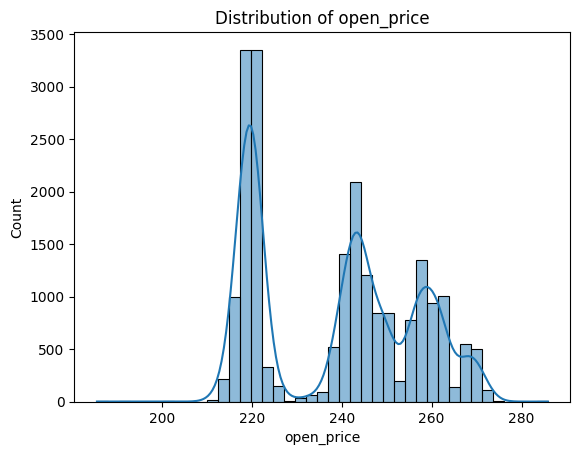

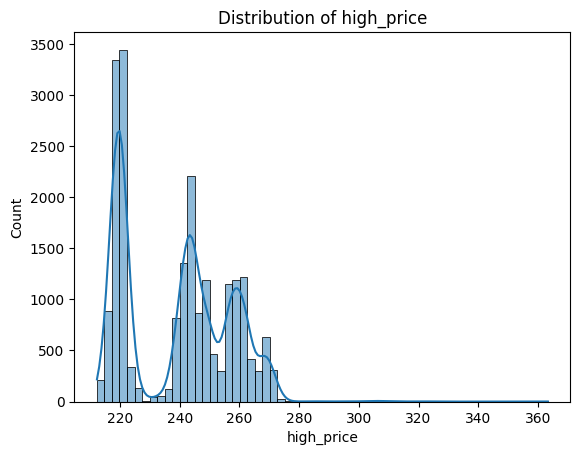

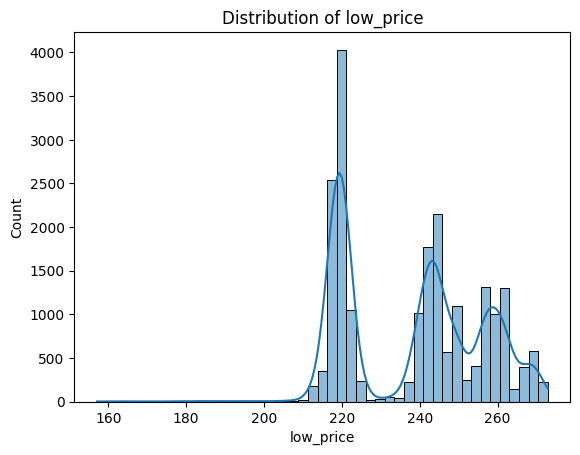

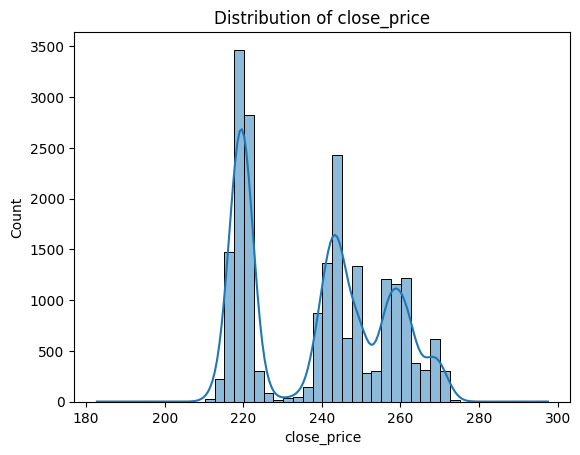

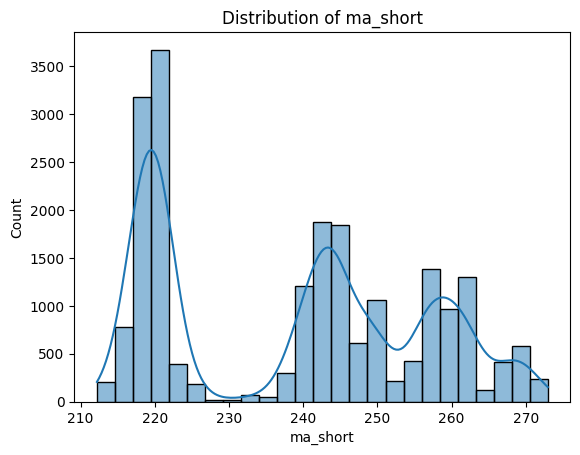

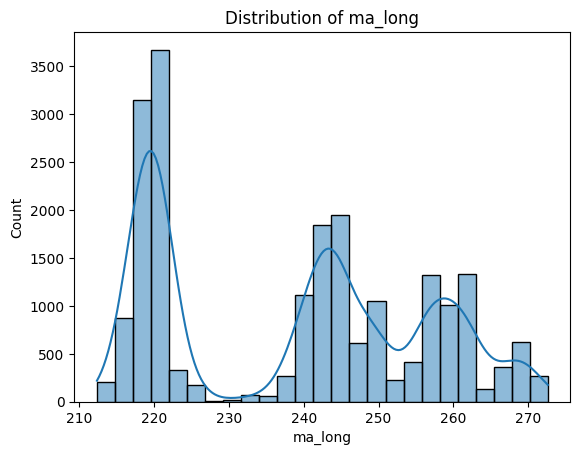

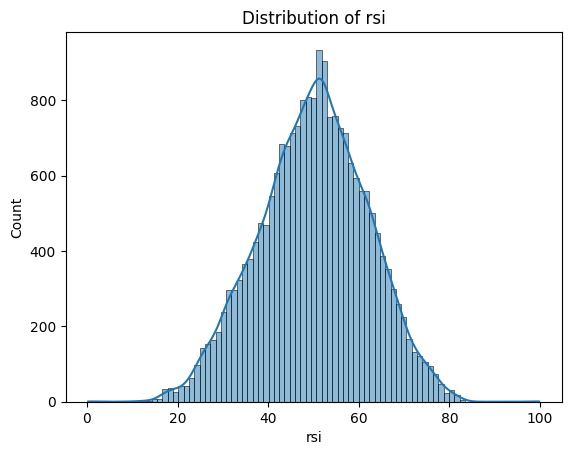

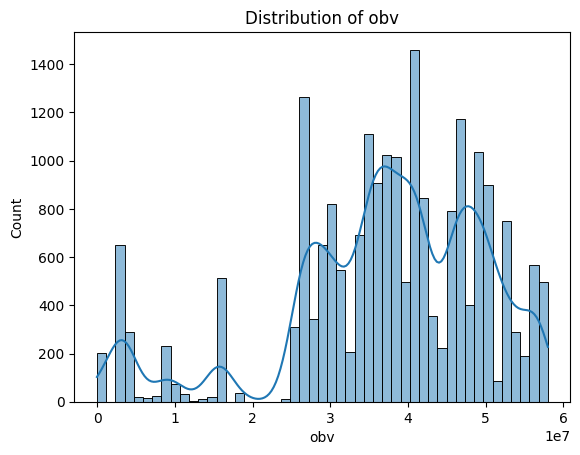

In [43]:
columns = ['open_price', 'high_price', 'low_price', 'close_price',
           'ma_short', 'ma_long', 'rsi', 'obv'
           ]
for column in columns:
    sns.histplot(data_tesla[column], kde=True)
    plt.title(f'Distribution of {column}')
    plt.show()

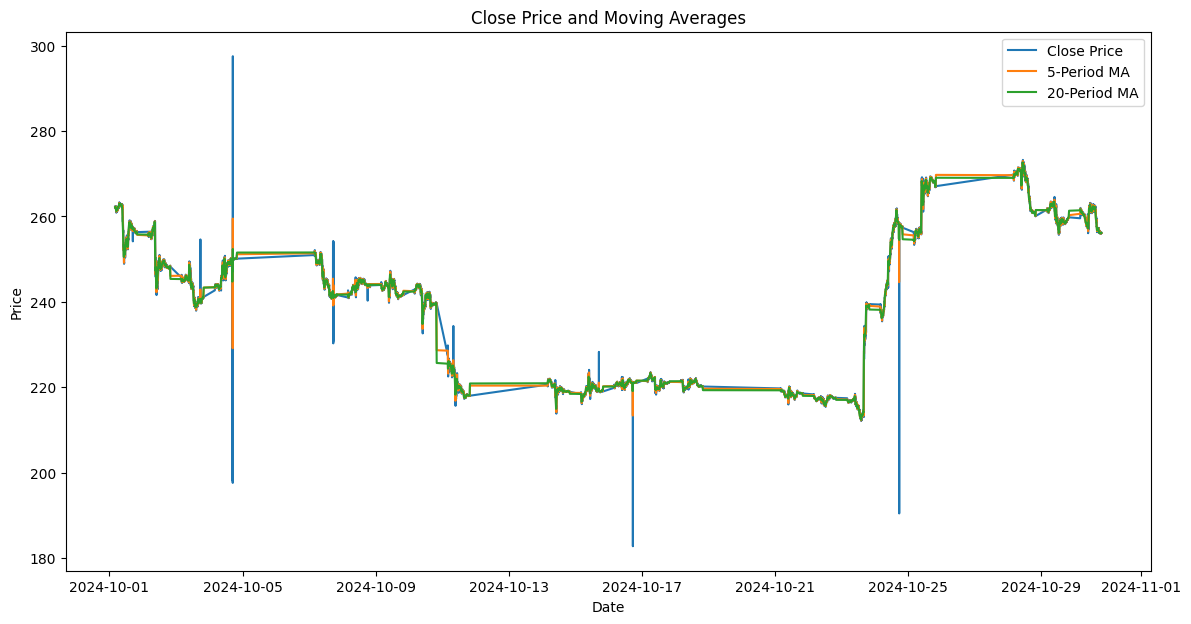

In [44]:
plt.figure(figsize=(14, 7))
plt.plot(data_tesla.index, data_tesla['close_price'], label='Close Price')
plt.plot(data_tesla.index, data_tesla['ma_short'], label='5-Period MA')
plt.plot(data_tesla.index, data_tesla['ma_long'], label='20-Period MA')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Close Price and Moving Averages')
plt.legend()
plt.show()

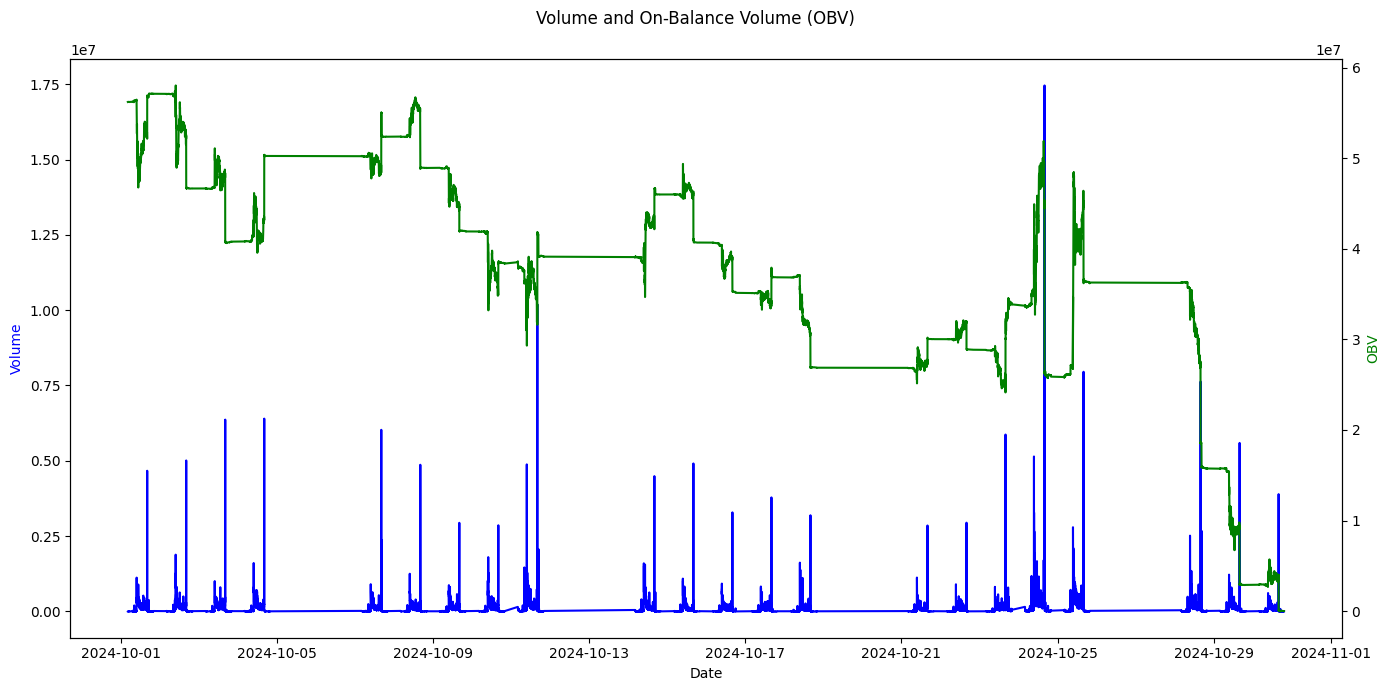

In [45]:
fig, ax1 = plt.subplots(figsize=(14, 7))
ax1.plot(data_tesla.index, data_tesla['volume'], color='blue', label='Volume')
ax1.set_xlabel('Date')
ax1.set_ylabel('Volume', color='blue')
ax2 = ax1.twinx()
ax2.plot(data_tesla.index, data_tesla['obv'], color='green', label='OBV')
ax2.set_ylabel('OBV', color='green')
fig.suptitle('Volume and On-Balance Volume (OBV)')
fig.tight_layout()
plt.show()

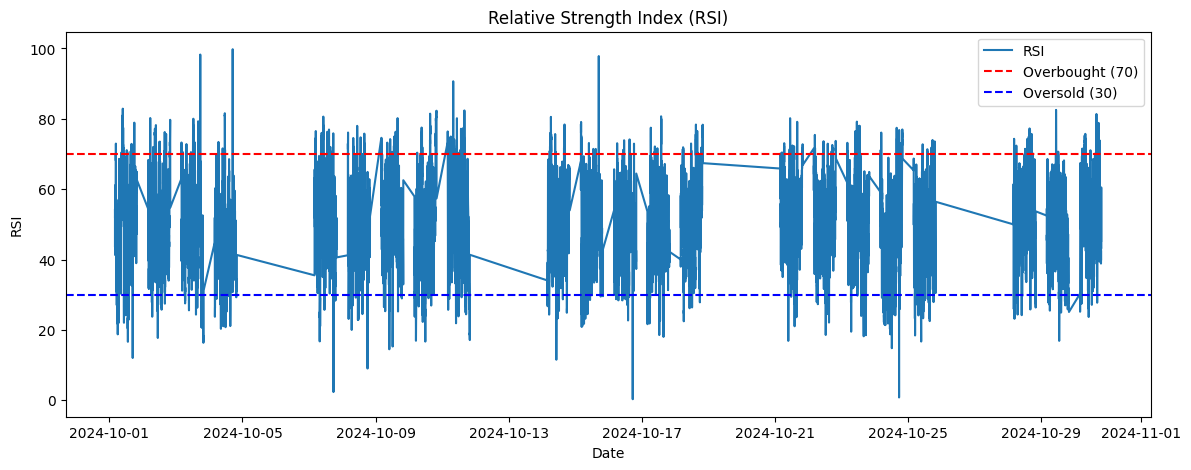

In [47]:
plt.figure(figsize=(14, 5))
plt.plot(data_tesla.index, data_tesla['rsi'], label='RSI')
plt.axhline(70, color='red', linestyle='--', label='Overbought (70)')
plt.axhline(30, color='blue', linestyle='--', label='Oversold (30)')
plt.xlabel('Date')
plt.ylabel('RSI')
plt.title('Relative Strength Index (RSI)')
plt.legend()
plt.show()

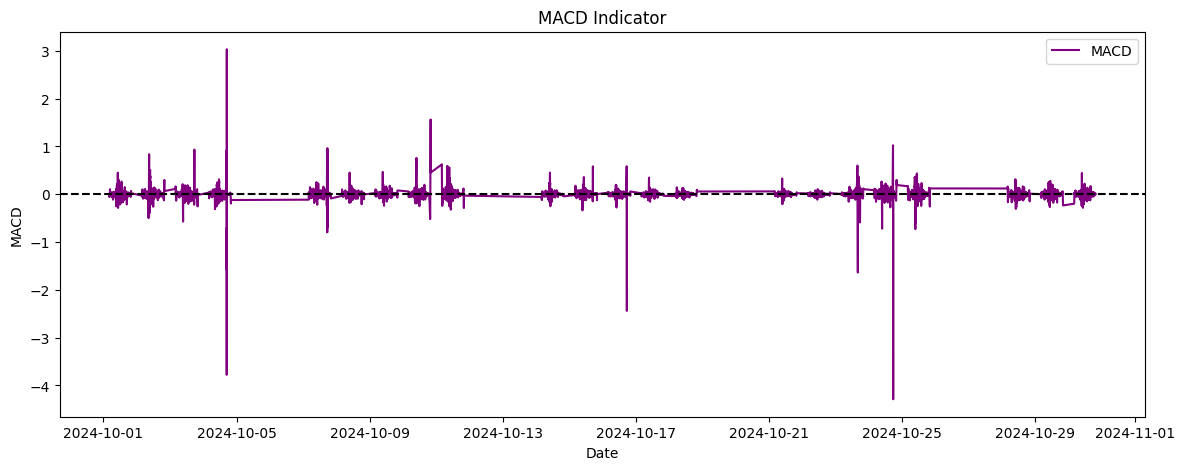

In [53]:
plt.figure(figsize=(14, 5))
plt.plot(data_tesla.index, data_tesla['macd'], label='MACD', color='purple')
plt.axhline(0, color='black', linestyle='--')
plt.xlabel('Date')
plt.ylabel('MACD')
plt.title('MACD Indicator')
plt.legend()
plt.show()

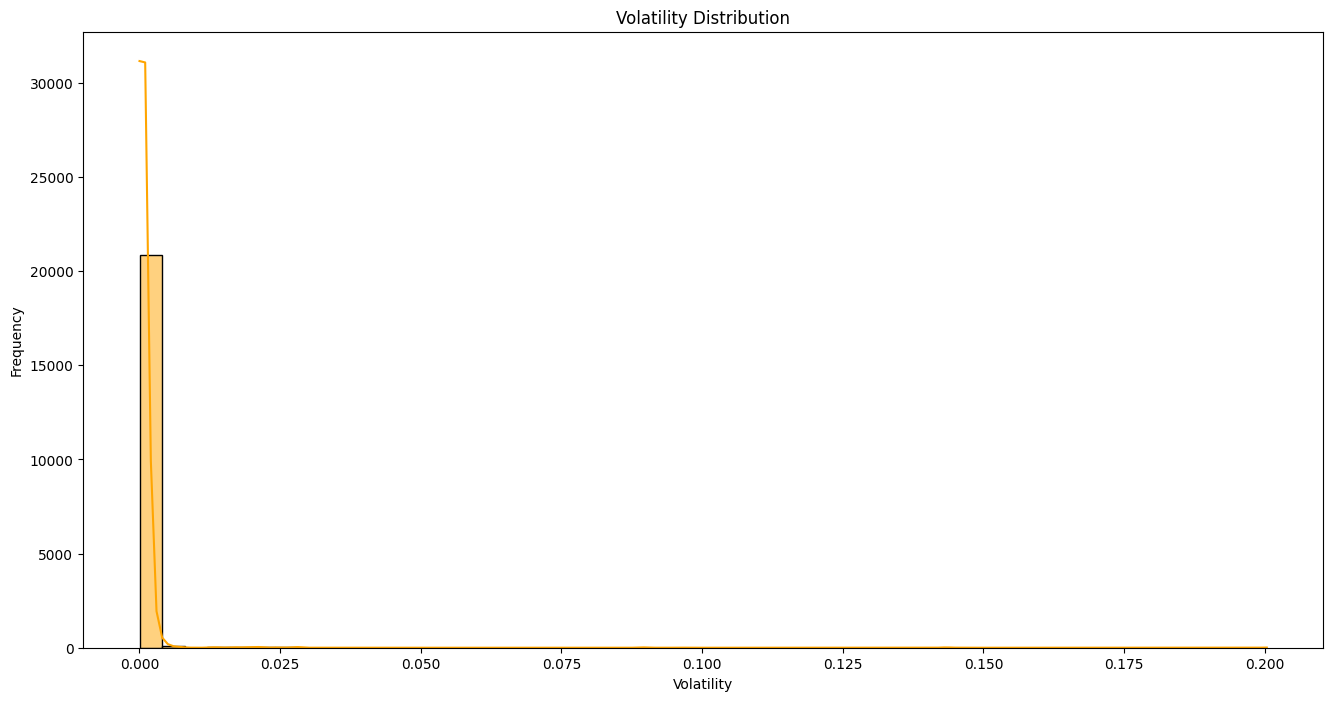

In [49]:
plt.figure(figsize=(16, 8))
sns.histplot(data_tesla['volatility'].dropna(), bins=50, kde=True, color="orange")
plt.title('Volatility Distribution')
plt.xlabel('Volatility')
plt.ylabel('Frequency')
plt.show()

# 6. Target Class Distribution (Positive vs. Negative Returns)


<ipython-input-51-b75b959dd844>:1: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data=data_tesla, x="target_cls", stat="count", multiple="dodge",


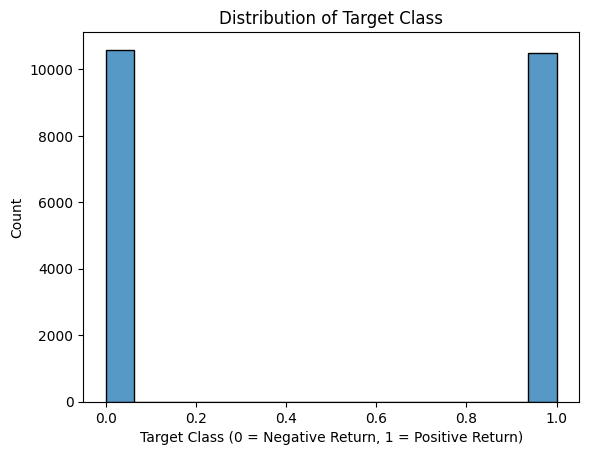

In [51]:

sns.histplot(data=data_tesla, x="target_cls", stat="count", multiple="dodge",
             kde=False, palette="pastel", element="bars", legend=True)

plt.xlabel("Target Class (0 = Negative Return, 1 = Positive Return)")
plt.ylabel("Count")
plt.title("Distribution of Target Class")
plt.show()

In [52]:
data_tesla['target_cls'].value_counts()

,count
target_cls,
0,10591
1,10485


our data is balnced for classification

## PCA
we will be using PCA to find the best set of features to predict the log return